In [2]:
import sys
sys.path.append('../../examples/inflammation')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import scipy.stats
import mpi4py.MPI as mpi

In [3]:
with np.load('il1b_data.npz', allow_pickle=True) as datfile:
    data = datfile['mrna_counts']

In [4]:
methods = ['full', 'bridge', 'multi', 'tuned']
method_names = ['Full-fidelity', 'ESS-Bridge', 'IT-Bridge', 'Tuned IT-Bridge']
par_names = ['r_1', 'r_2', 
             'k_{{01}}', 'a_{{10}}', 'b_{{10}}', 'k_{{12}}', 'k_{{21}}', '\\alpha_1', '\\alpha_2', '\\gamma', 'T_0']
method_colors = ['Red', 'Orange', 'DarkGreen', 'Magenta']
method_ls = ['--', ':', '-', 'dotted']

In [5]:
for imeth in range(0, len(methods)):
    with np.load(f'il1b_prediction_{methods[imeth]}.npz', allow_pickle=True) as pred_file:
        exec(f'mean_{methods[imeth]} = pred_file["mean"]')
        exec(f'std_{methods[imeth]} = pred_file["std"]')

In [6]:
print(std_bridge/mean_bridge)
np.sum(mean_bridge)

[[0.07272009 0.04818968 0.04153508 ... 0.7421011  0.79103058 0.77775492]
 [0.08507732 0.0427628  0.04271076 ... 0.2440385  0.24422937 0.34161512]
 [0.11120189 0.0466013  0.04571114 ... 0.44445695 0.48807555 0.19853523]
 [0.10736805 0.04588574 0.04622411 ... 0.25119804 0.2874883  0.19933364]
 [0.10075994 0.0451708  0.04666369 ... 0.38582867 0.4129881  0.19920209]]


5.000000173138376

(5, 2059)

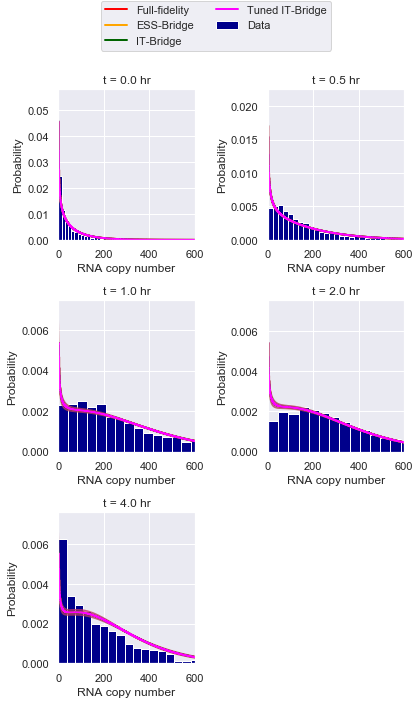

In [23]:
T_MEASUREMENTS = np.array([0, 0.5, 1, 2, 4])

tidx_to_plot = [0, 1, 2, 3, 4]

sns.set(style='darkgrid')
fig, axes = plt.subplots(3, 2)
fig.set_tight_layout(True)
fig.set_size_inches(6, 9)
# rna_bins = np.concatenate((np.array([0, 16]), np.linspace(16, 1000, 100)))
# rna_bins = np.logspace(-8, 3, 100)
rna_bins = np.arange(0, 1000)
for i in range(0, len(tidx_to_plot)):
        j = tidx_to_plot[i]
        iax = i // 2
        jax = i % 2
        sns.distplot(data[j], ax=axes[iax, jax], norm_hist=True, kde=False, label="Data", 
                     color="DarkBlue", hist_kws={'alpha': 1})
  
        for imeth in range(0, len(methods)):
            meanvec = eval(f'mean_{methods[imeth]}[{j}, :]')
            stdvec = eval(f'std_{methods[imeth]}[{j}, :]')
            nmax = len(meanvec)
            axes[iax, jax].plot(np.arange(0, nmax), meanvec, color=method_colors[imeth], label=method_names[imeth], 
                         linewidth=2, drawstyle='steps-post')        
            axes[iax, jax].fill_between(np.arange(0, nmax), meanvec + 3*stdvec, 
                             meanvec - 3*stdvec,
                            color=method_colors[imeth], alpha=0.25, label='', zorder=2)

                
        axes[iax, jax].set_ylabel('Probability')
        axes[iax, jax].set_xlabel('RNA copy number')
        axes[iax, jax].set_title(f't = {T_MEASUREMENTS[j]} hr')
        axes[iax, jax].set_xlim([0,600])
        [y1, y2] = axes[iax, jax].get_ylim()
        axes[iax, jax].set_ylim([0,y2])

h, l = axes[0,0].get_legend_handles_labels()
axes[-1,-1].remove()
fig.legend(h, l, bbox_to_anchor=(0, 1, 1, 1), loc='lower center', ncol = 2)
fig.savefig('il1b_fits.pdf', bbox_inches='tight')    
mean_bridge.shape